In [92]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

In [93]:
#### ORDENACION 1,2,3,4 ... de los FOLDERS

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

In [94]:
#### CARGAMOS LOS FOLDERS DE TRABAJO

r = os.listdir()
Fluences = []
for element in r:
    if element.startswith("Fluence",):
        Fluences.append(element)
        
#### GUARDADAS LOS PATHS A LAS FLUENCIAS (STRING)
Fluences.sort(key = natural_keys)

colors = plt.cm.rainbow(np.linspace(0,1,len(Fluences)))

#### GUARDADOS LOS VALORES DE FLUENCIA (FLOAT)
F = []
i = 0
for i,f in enumerate(Fluences):
    F.append(re.findall(r'\d+.\d+', f))
    F[i] = float(F[i][0])
F = np.asarray(F)

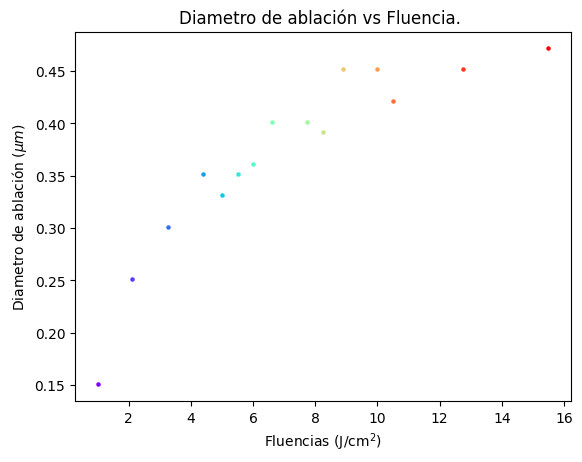

In [95]:
i = 0
for fluence in Fluences:
    Depth_Folder = os.listdir(fluence)
    Diameter_Folder = os.listdir(fluence)
    Diameter = np.load(fluence+"/"+Diameter_Folder[0])
    
    plt.scatter(F[i],Diameter[0]*1e6,color = colors[i],label = f"F:{F[i]:.2f} J/cm$^2$",s=5)
    plt.xlabel("Fluencias (J/cm$^2$)")
    plt.ylabel(fr"Diametro de ablación ($\mu m$)");
    plt.title("Diametro de ablación vs Fluencia. ")
    i += 1

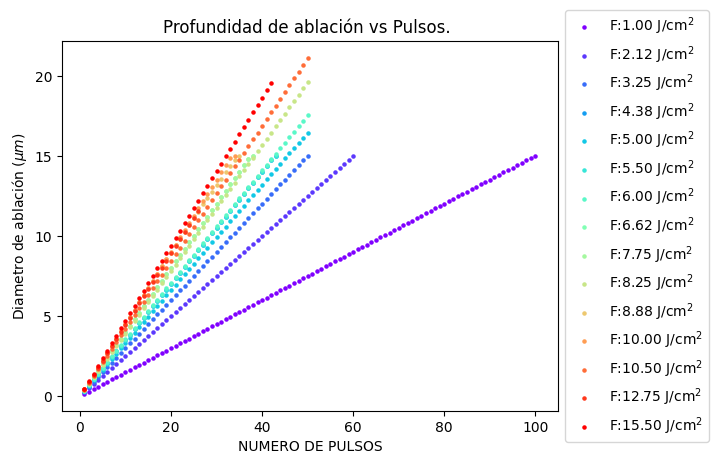

In [96]:
i = 0
for fluence in Fluences:
    Depth_Folder = os.listdir(fluence)
    Depth = np.load(fluence+"/"+Depth_Folder[0])
    plt.scatter(range(1,len(Depth)+1),Depth*1e6,color = colors[i],label = f"F:{F[i]:.2f} J/cm$^2$",s=5)
    plt.xlabel("NUMERO DE PULSOS")
    plt.ylabel(fr"Diametro de ablación ($\mu m$)");
    plt.title("Profundidad de ablación vs Pulsos. ")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    i += 1
    
    
